In [6]:
from datasets.load import load_from_disk
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# desired size of the output image
imsize = 256
loader = transforms.Compose([
    transforms.Resize(imsize), 
    transforms.ToTensor()])  

In [7]:
dataset_clean = load_from_disk('../clean-train/train/')
dataset_clean = dataset_clean.with_format('np')


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

image = dataset_clean[0]['target']
image = Image.fromarray(image)
image = loader(image).unsqueeze(0)
content_img = image.to(device, torch.float)

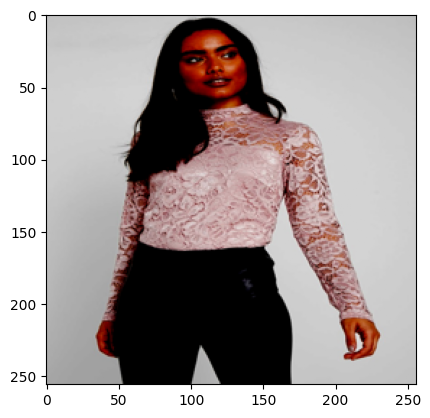

In [8]:
plt.imshow(image[0].permute(1, 2, 0))

In [ ]:
# save image
import torchvision

torchvision.utils.save_image(image, 'test.png')